<a href="https://colab.research.google.com/github/ArtemDorofeev/IT-education-project/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%BA%D1%83%D1%80%D1%81%D1%8B_Checkroi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown --id 1I9l7qGtyLzwiR0V2QCr4_GFCYl17v0dW

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1I9l7qGtyLzwiR0V2QCr4_GFCYl17v0dW
To: /content/dataset_courses.xlsx
100% 116k/116k [00:00<00:00, 106MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import seaborn as sns
import sklearn.linear_model as lm
import statsmodels.api as sm
import statsmodels.formula.api as smf
import re

In [ ]:
dataset = pd.read_excel('dataset_courses.xlsx') 

# --- Разведочный анализ ---

## Форматирование

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       624 non-null    int64 
 1   name             624 non-null    object
 2   category         624 non-null    object
 3   long             624 non-null    int64 
 4   level            624 non-null    object
 5   key_skills       624 non-null    object
 6   key_stecks       624 non-null    object
 7   price1           624 non-null    object
 8   price2           624 non-null    object
 9   cource_rate_rev  624 non-null    object
 10  review           624 non-null    int64 
 11  rate             624 non-null    object
 12  diploma          624 non-null    object
 13  format           624 non-null    object
dtypes: int64(3), object(11)
memory usage: 68.4+ KB


In [ ]:
def school_name(val):
  i = val.rfind('от')
  school = val[i+3:]
  school = school.lower()
  return school

dataset['school'] = dataset['name'].apply(school_name)

In [ ]:
df = dataset[['name', 'school',	'category',	'long',	'level',	'key_skills',	'key_stecks',	'price1',	'price2',	'cource_rate_rev', 'review', 'rate', 'diploma',	'format']]

In [ ]:
df

,name,school,category,long,level,key_skills,key_stecks,price1,price2,cource_rate_rev,review,rate,diploma,format
0,Профессия «С#-разработчик» от Skillbox,skillbox,Backend-разработка,12,"[<a href=""https://checkroi.ru/uroven/novichkam...",[],"[<a href=""https://checkroi.ru/tehnologii/3ds-m...",166750,125063,10 3,277,★4.8,none,Записанные видеоуроки
1,Курс «Инженер-программист C++ Мастер» от GeekB...,geekbrains,Fullstack-разработка,24,"[<a href=""https://checkroi.ru/uroven/novichkam...","[<a href=""https://checkroi.ru/chemu-nauchites/...","[<a href=""https://checkroi.ru/tehnologii/linux...",350028,264780,10 0,81,★4.8,Диплом государственного образца,"Вебинары, Записанные видеоуроки"
2,Курс «Программист JavaScript» от GeekBrains,geekbrains,Frontend-разработка,12,"[<a href=""https://checkroi.ru/uroven/novichkam...","[<a href=""https://checkroi.ru/chemu-nauchites/...","[<a href=""https://checkroi.ru/tehnologii/git/""...",250020,159408,10 0,81,★4.8,Диплом государственного образца,"Вебинары, Записанные видеоуроки"
3,Курс «Fullstack-разработчик Мастер» от GeekBrains,geekbrains,Fullstack-разработка,24,"[<a href=""https://checkroi.ru/uroven/novichkam...","[<a href=""https://checkroi.ru/chemu-nauchites/...","[<a href=""https://checkroi.ru/tehnologii/git/""...",350028,264780,10 0,81,★4.8,Диплом государственного образца,"Вебинары, Записанные видеоуроки"
4,Курс «Fullstack-разработчик» от GeekBrains,geekbrains,Fullstack-разработка,12,"[<a href=""https://checkroi.ru/uroven/novichkam...","[<a href=""https://checkroi.ru/chemu-nauchites/...","[<a href=""https://checkroi.ru/tehnologii/git/""...",250020,159408,10 0,81,★4.8,Диплом государственного образца,"Вебинары, Записанные видеоуроки"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,Курс «Технические навыки» от SF Education,sf education,Аналитика данных,6,"[<a href=""https://checkroi.ru/uroven/opytnym/""...","[<a href=""https://checkroi.ru/chemu-nauchites/...","[<a href=""https://checkroi.ru/tehnologii/micro...",124 000,\t\t,8.3 0,2,★5.0,none,"Вебинары, Записанные видеоуроки"
620,Профессия «Data Engineer» от Productstar,productstar,Аналитика данных,6,"[<a href=""https://checkroi.ru/uroven/novichkam...",[],"[<a href=""https://checkroi.ru/tehnologii/aws/""...",69000,39000,7.7 0,43,★4.8,none,Записанные видеоуроки
621,Курс «Аналитика для руководителей и владельцев...,skillfactory,Аналитика данных,6,"[<a href=""https://checkroi.ru/uroven/professio...",[],"[<a href=""https://checkroi.ru/tehnologii/googl...",108804,65280,7.7 0,73,★4.7,none,"Вебинары, Записанные видеоуроки"
622,Курс «Веб-аналитика» от IMBA,imba,Бизнес-аналитика,3,"[<a href=""https://checkroi.ru/uroven/novichkam...","[<a href=""https://checkroi.ru/chemu-nauchites/...","[<a href=""https://checkroi.ru/tehnologii/comag...",100000,35000,7.7 0,17,★4.9,Диплом школы,Записанные видеоуроки


In [ ]:
# Приводим значение цен к единому формату

df['price1'] = df['price1'].apply(lambda x: str(x))
df['price2'] = df['price2'].apply(lambda x: str(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
def digit(val):
  if val.isdigit():
    price = val
  else:
    lst = re.findall(r'\d+', val)
    price = ''.join(lst)
  return price

df['price1'] = df['price1'].apply(digit)
df['price2'] = df['price2'].apply(digit)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
df['price1'] = df['price1'].apply(lambda x: int(x) if x else np.nan)
df['price2'] = df['price2'].apply(lambda x: int(x) if x else np.nan)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Формируем списки из значений в колонках

df['level'] = df['level'].apply(lambda x: x.split(','))
df['key_skills'] = df['key_skills'].apply(lambda x: x.split(','))
df['key_stecks'] = df['key_stecks'].apply(lambda x: x.split(','))

df['cource_rate_rev'] = df['cource_rate_rev'].apply(lambda x: x.split(' '))
df['cource_rate'] = df['cource_rate_rev'].apply(lambda x: float(x[0]))
df['cource_rev'] = df['cource_rate_rev'].apply(lambda x: int(x[3]))

df['rate'] = df['rate'].apply(lambda x: float(x[1:]))
df['format'] = df['format'].apply(lambda x: x.split(','))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
# Вытаскиваем теги из ссылок

def tag_link(val):
  tag_list = []
  for i in val:
    begin = i.find('>')
    end = i.rfind('<')
    tag = i[begin+1:end]
    tag_list.append(tag)
  return tag_list

df['level'] = df['level'].apply(tag_link)
df['key_skills'] = df['key_skills'].apply(tag_link)
df['key_stecks'] = df['key_stecks'].apply(tag_link)

In [ ]:
# Убираем пропуски, нерелевантные значения

df['key_skills'] = df['key_skills'].apply(lambda x: [] if x[0] == '[' else x)
df['key_stecks'] = df['key_stecks'].apply(lambda x: [] if x[0] == '[' else x)
df['level'] = df['level'].apply(lambda x: [] if x[0] == '[' else x)
df['diploma'] = df['diploma'].apply(lambda x: 'Без документа' if x == 'none' else x)
df['price2'].fillna(df['price1'], axis='index', inplace=True)

In [ ]:
# Убираем лишние пробелы

def skip_space(val):
  lst = []
  for i in val:
    x = i.lstrip()
    lst.append(x)
  return lst

df['format'] = df['format'].apply(skip_space)

In [ ]:
df = df[['name', 'school',	'category',	'long',	'level',	'key_skills',	'key_stecks',	'price1',	'price2',	'cource_rate', 'cource_rev', 'review', 'rate', 'diploma',	'format']]
df

,name,school,category,long,level,key_skills,key_stecks,price1,price2,cource_rate,cource_rev,review,rate,diploma,format
0,Профессия «С#-разработчик» от Skillbox,skillbox,Backend-разработка,12,"[Новичкам, Профессионалам]",[],"[3ds Max, ArchiCAD, Git, Microsoft Visual Stud...",166750,125063.0,10.0,3,277,4.8,Без документа,[Записанные видеоуроки]
1,Курс «Инженер-программист C++ Мастер» от GeekB...,geekbrains,Fullstack-разработка,24,[Новичкам],"[C, C++, TCP/IP]","[Linux, QT, Unreal Engine]",350028,264780.0,10.0,0,81,4.8,Диплом государственного образца,"[Вебинары, Записанные видеоуроки]"
2,Курс «Программист JavaScript» от GeekBrains,geekbrains,Frontend-разработка,12,[Новичкам],"[CSS, HTML, Java, JavaScript, NoSQL, Spring, SQL]","[Git, Linux]",250020,159408.0,10.0,0,81,4.8,Диплом государственного образца,"[Вебинары, Записанные видеоуроки]"
3,Курс «Fullstack-разработчик Мастер» от GeekBrains,geekbrains,Fullstack-разработка,24,[Новичкам],"[CSS, HTML, JavaScript, Laravel, PHP, SQL, Осн...",[Git],350028,264780.0,10.0,0,81,4.8,Диплом государственного образца,"[Вебинары, Записанные видеоуроки]"
4,Курс «Fullstack-разработчик» от GeekBrains,geekbrains,Fullstack-разработка,12,[Новичкам],"[CSS, HTML, JavaScript, Laravel, PHP, SQL, Осн...",[Git],250020,159408.0,10.0,0,81,4.8,Диплом государственного образца,"[Вебинары, Записанные видеоуроки]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,Курс «Технические навыки» от SF Education,sf education,Аналитика данных,6,[Опытным],"[VBA, Работа с таблицами]","[Microsoft Excel, Microsoft PowerBI, Microsoft...",124000,124000.0,8.3,0,2,5.0,Без документа,"[Вебинары, Записанные видеоуроки]"
620,Профессия «Data Engineer» от Productstar,productstar,Аналитика данных,6,[Новичкам],[],"[AWS, Azure, BigQuery, Google Data Studio, Had...",69000,39000.0,7.7,0,43,4.8,Без документа,[Записанные видеоуроки]
621,Курс «Аналитика для руководителей и владельцев...,skillfactory,Аналитика данных,6,[Профессионалам],[],"[Google Data Studio, Metabase, Microsoft Excel...",108804,65280.0,7.7,0,73,4.7,Без документа,"[Вебинары, Записанные видеоуроки]"
622,Курс «Веб-аналитика» от IMBA,imba,Бизнес-аналитика,3,"[Новичкам, Опытным]","[Customer Journey Map, А/B-тестирование, УТП]","[CoMagic, Google Analytics, Google Data Studio...",100000,35000.0,7.7,0,17,4.9,Диплом школы,[Записанные видеоуроки]


## Анализ колонок

### Обучающие школы

In [ ]:
df['school'].value_counts()[:10]

geekbrains           143
skillbox             119
noneологии            71
otus                  54
skillfactory          51
яндекс практикума     27
productstar           23
loftschool            12
fructcode              9
skypro                 9
Name: school, dtype: int64

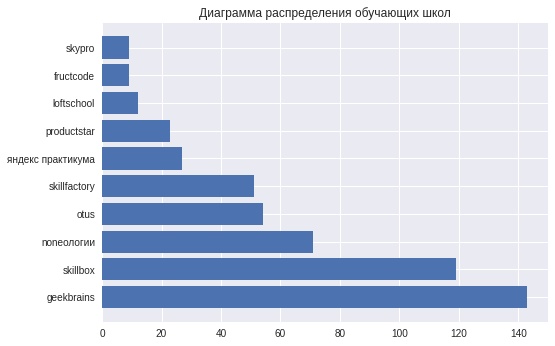

In [ ]:
plt.style.use('seaborn')
plt.barh(df['school'].value_counts()[:10].index, df['school'].value_counts()[:10].values)
plt.title('Диаграмма распределения обучающих школ')
plt.show()

### Категории курсов (тематическая направленность)

In [ ]:
df['category'].value_counts()[:10]

Backend-разработка                 128
Аналитика данных                    75
Data Science                        50
Администрирование и DevOps          49
Бизнес-аналитика                    47
Frontend-разработка                 44
Разработка мобильных приложений     39
Fullstack-разработка                31
Тестирование ПО                     30
Разработка игр                      23
Name: category, dtype: int64

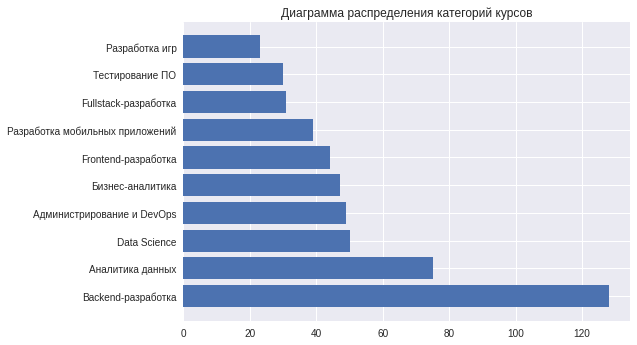

In [ ]:
plt.style.use('seaborn')
plt.barh(df['category'].value_counts()[:10].index, df['category'].value_counts()[:10].values)
plt.title('Диаграмма распределения категорий курсов')
plt.show()

### Продолжительность обучения

In [ ]:
df['long'].describe().astype(int)

count    624
mean       8
std        6
min        1
25%        3
50%        6
75%       12
max       48
Name: long, dtype: int64

(-0.5, 0.5, -1.35, 30.0)

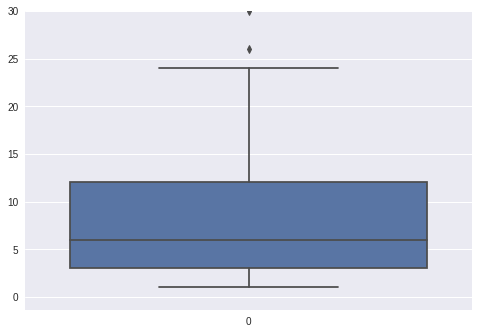

In [ ]:
sns.boxplot(data=df['long'])
plt.axis(ymax= 30)

### Уровень сложности

In [ ]:
dx_level = df.explode('level')
dx_skills = df.explode('key_skills')
dx_stecks = df.explode('key_stecks')
dx_format = df.explode('format')

In [ ]:
dx_level['level'].value_counts()

Новичкам          429
Опытным           280
Профессионалам    113
Name: level, dtype: int64

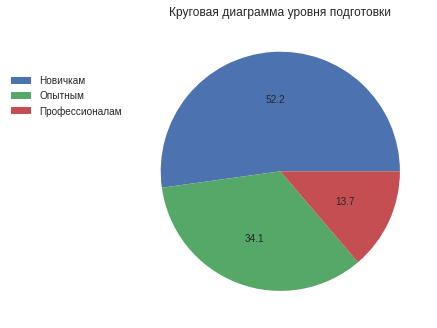

In [ ]:
plt.pie(dx_level['level'].value_counts().values, autopct='%.1f')
plt.legend(bbox_to_anchor = (-0.25, 0.60, 0.25, 0.25), labels = dx_level['level'].value_counts().index)
plt.title('Круговая диаграмма уровня подготовки')
plt.show()

### Ключевые навыки

In [ ]:
dx_skills['key_skills'].value_counts()[:10]

SQL           190
Python        166
JavaScript    111
HTML          109
CSS            98
ООП            92
API            78
Java           65
NoSQL          62
REST API       60
Name: key_skills, dtype: int64

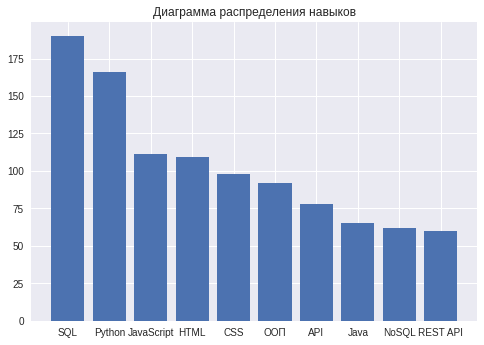

In [ ]:
plt.style.use('seaborn')
plt.bar(dx_skills['key_skills'].value_counts()[:10].index, dx_skills['key_skills'].value_counts()[:10].values)
plt.title('Диаграмма распределения навыков')
plt.show()

### Стек технологий

In [ ]:
dx_stecks['key_stecks'].value_counts()[:10]

Git                  196
Docker                91
Linux                 85
Microsoft Excel       84
MySQL                 74
Microsoft PowerBI     70
GitHub                68
PostgreSQL            64
MongoDB               56
Google Analytics      46
Name: key_stecks, dtype: int64

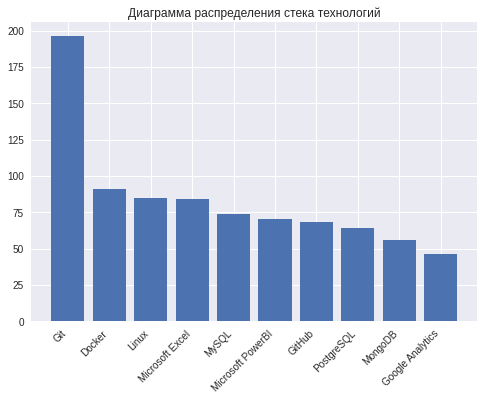

In [ ]:
plt.style.use('seaborn')
plt.bar(dx_stecks['key_stecks'].value_counts()[:10].index, dx_stecks['key_stecks'].value_counts()[:10].values)
plt.title('Диаграмма распределения стека технологий')
plt.xticks(rotation=45, ha='right')
plt.show()

### Стоимость курсов

In [ ]:
df['price2'].describe().astype(int)

count       624
mean      85500
std       82334
min           0
25%       30825
50%       64950
75%      120532
max      800000
Name: price2, dtype: int64

(-40000.0, 300000.0, 0.0, 110.25)

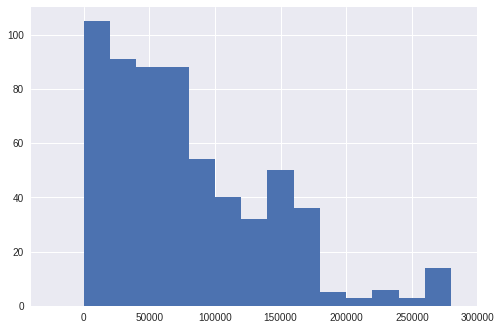

In [ ]:
df['price2'].hist(bins = 40)
plt.axis(xmax= 300000)

(-0.5, 0.5, -40000.0, 300000.0)

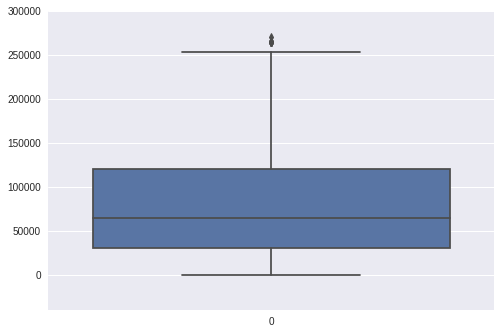

In [ ]:
sns.boxplot(data=df['price2'])
plt.axis(ymax= 300000)

### Рейтинг курсов

In [ ]:
df['cource_rate'].describe()

count    624.000000
mean       8.359135
std        1.321381
min        3.500000
25%        7.600000
50%        8.500000
75%        9.400000
max       10.000000
Name: cource_rate, dtype: float64

(4.0, 10.325, 0.0, 136.5)

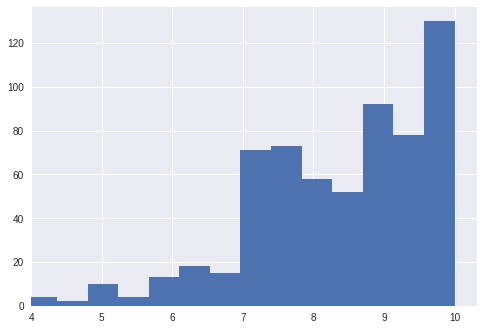

In [ ]:
df['cource_rate'].hist(bins = 15)
plt.axis(xmin = 4)

(-0.5, 0.5, 4.0, 10.325)

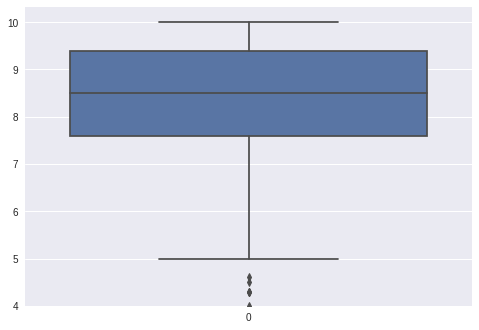

In [ ]:
sns.boxplot(data = df['cource_rate'])
plt.axis(ymin = 4)

### Количество отзывов на курс

In [ ]:
df['cource_rev'].describe().astype(int)

count    624
mean       0
std        1
min        0
25%        0
50%        0
75%        0
max       10
Name: cource_rev, dtype: int64

In [ ]:
df['cource_rev'].value_counts()

0     544
1      31
3      24
2      12
9       5
5       4
7       1
6       1
10      1
8       1
Name: cource_rev, dtype: int64

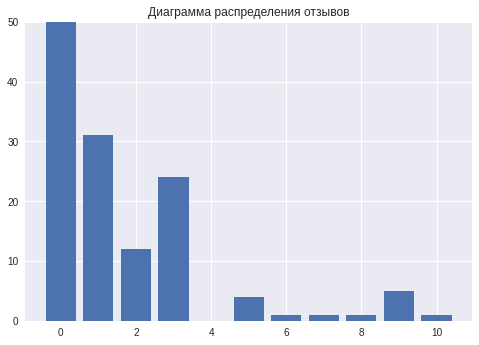

In [ ]:
plt.style.use('seaborn')
plt.bar(df['cource_rev'].value_counts().index, df['cource_rev'].value_counts().values)
plt.axis(ymax = 50)
plt.title('Диаграмма распределения отзывов')
plt.show()

### Выдаваемый документ

In [ ]:
df['diploma'].value_counts()

Диплом школы                       328
Без документа                      223
Диплом государственного образца     73
Name: diploma, dtype: int64

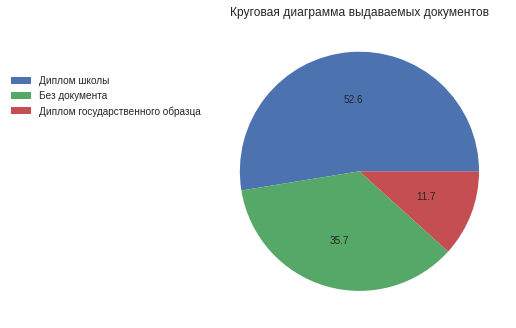

In [ ]:
plt.pie(df['diploma'].value_counts().values, autopct='%.1f')
plt.legend(bbox_to_anchor = (-0.25, 0.60, 0.25, 0.25), labels = df['diploma'].value_counts().index)
plt.title('Круговая диаграмма выдаваемых документов')
plt.show()

### Формат обучения

In [ ]:
dx_format['format'].value_counts()

Вебинары                 384
Записанные видеоуроки    380
Тренажёры                 52
None                       1
Name: format, dtype: int64

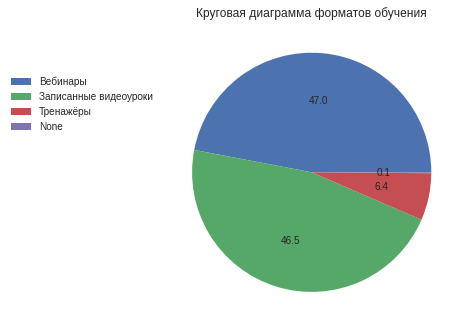

In [ ]:
plt.pie(dx_format['format'].value_counts().values, autopct='%.1f')
plt.legend(bbox_to_anchor = (-0.25, 0.60, 0.25, 0.25), labels = dx_format['format'].value_counts().index)
plt.title('Круговая диаграмма форматов обучения')
plt.show()

## Анализ взаимосвязей

### Обучающая школа:
*   Количество программ
*   Тематическая направленность
*   Продолжительность
*   Содержание
*   Стоимость курсов
*   Рейтинг курсов, школы, отзывы







In [ ]:
# Списки категорий по группам разработка и консалтинг

dev_list = ['Backend-разработка', 'Администрирование и DevOps', 'Frontend-разработка', 'Разработка мобильных приложений', 'Fullstack-разработка', 'Тестирование ПО', 'Разработка игр', 'Программирование для школьников'] 
cons_list = ['Аналитика данных', 'Data Science', 'Бизнес-аналитика', 'Аналитика больших данных (big data)', 'Веб-аналитика', 'Кибербезопасность', 'Финансовая аналитика', 'Продуктовая аналитика', 'UX-аналитика', 'Визуализация данных', 'Сетевые технологии', 'Игровая аналитика', 'CX-исследования']



In [ ]:
# Датасет ТОП 10 обучающих школ

df_school = df[(df['school'] == 'geekbrains') | 
               (df['school'] == 'skillbox') | 
               (df['school'] == 'noneологии') | 
               (df['school'] == 'otus') | 
               (df['school'] == 'skillfactory') | 
               (df['school'] == 'яндекс практикума') | 
               (df['school'] == 'productstar') | 
               (df['school'] == 'loftschool') | 
               (df['school'] == 'fructcode') | 
               (df['school'] == 'skypro')]

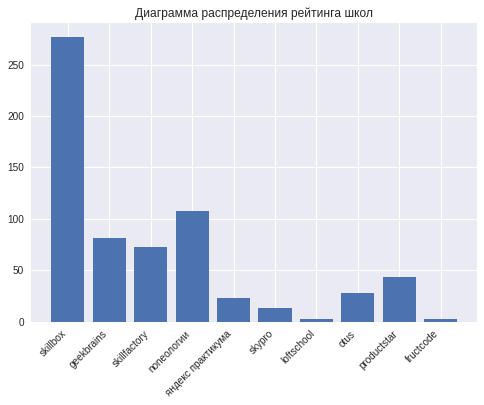

In [ ]:
# Количество отзывов о школе

plt.style.use('seaborn')
plt.bar(df_school['school'], df_school['review'])
plt.title('Диаграмма распределения рейтинга школ')
plt.xticks(rotation=45, ha='right')
plt.show()

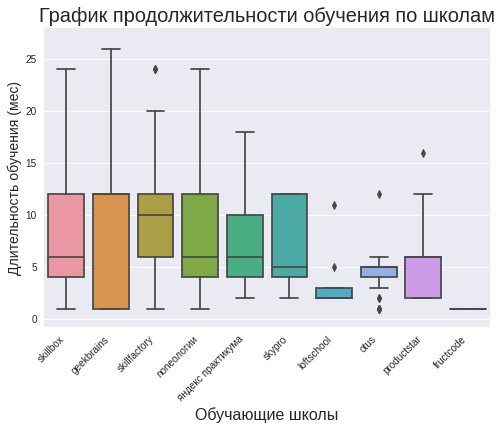

In [ ]:
# Продолжительность обучения

spec_bxp = sns.boxplot(x='school', y='long', data=df_school)
spec_bxp.axes.set_title('График продолжительности обучения по школам' , fontsize=20)
spec_bxp.set_xlabel('Обучающие школы', fontsize=16)
spec_bxp.set_ylabel('Длительность обучения (мес)', fontsize=14)
plt.axis(ymax=28)
plt.xticks(rotation=45, ha='right')
plt.show()

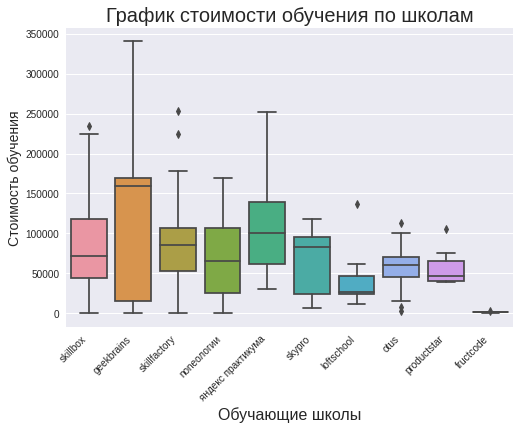

In [ ]:
# Стоимсоть обучения

spec_bxp = sns.boxplot(x='school', y='price2', data=df_school)
spec_bxp.axes.set_title('График стоимости обучения по школам' , fontsize=20)
spec_bxp.set_xlabel('Обучающие школы', fontsize=16)
spec_bxp.set_ylabel('Стоимость обучения', fontsize=14)
#plt.axis(ymax=28)
plt.xticks(rotation=45, ha='right')
plt.show()

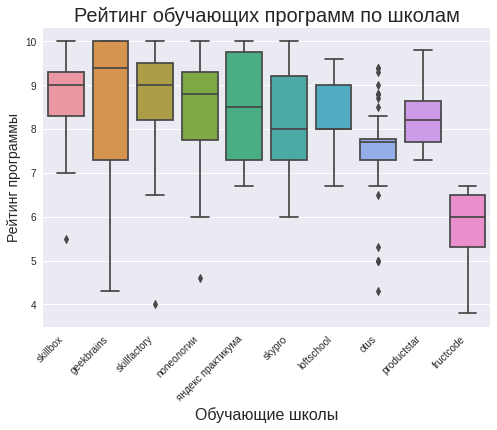

In [ ]:
# Рейтинг курсов

spec_bxp = sns.boxplot(x='school', y='cource_rate', data=df_school)
spec_bxp.axes.set_title('Рейтинг обучающих программ по школам' , fontsize=20)
spec_bxp.set_xlabel('Обучающие школы', fontsize=16)
spec_bxp.set_ylabel('Рейтинг программы', fontsize=14)
#plt.axis(ymin = 4)
plt.xticks(rotation=45, ha='right')
plt.show()

### Сравнение категорий


In [ ]:
df.head(2)

,name,school,category,long,level,key_skills,key_stecks,price1,price2,cource_rate,cource_rev,review,rate,diploma,format
0,Профессия «С#-разработчик» от Skillbox,skillbox,Backend-разработка,12,"[Новичкам, Профессионалам]",[],"[3ds Max, ArchiCAD, Git, Microsoft Visual Stud...",166750,125063.0,10.0,3,277,4.8,Без документа,[Записанные видеоуроки]
1,Курс «Инженер-программист C++ Мастер» от GeekB...,geekbrains,Fullstack-разработка,24,[Новичкам],"[C, C++, TCP/IP]","[Linux, QT, Unreal Engine]",350028,264780.0,10.0,0,81,4.8,Диплом государственного образца,"[Вебинары, Записанные видеоуроки]"


#### Диплом - стоимость  курса, рейтинг (категориальная - колич, колич)

In [ ]:
df['diploma'].value_counts()

Диплом школы                       328
Без документа                      223
Диплом государственного образца     73
Name: diploma, dtype: int64

In [ ]:
diploma_salary = df.groupby('diploma')['price2']
diploma_salary.describe().astype(int)

,count,mean,std,min,25%,50%,75%,max
diploma,,,,,,,,
Без документа,223,67069,53023,0,26282,54600,97000,224595
Диплом государственного образца,73,198789,147117,26910,159408,159408,264780,800000
Диплом школы,328,72817,54615,570,27580,63000,100755,270000


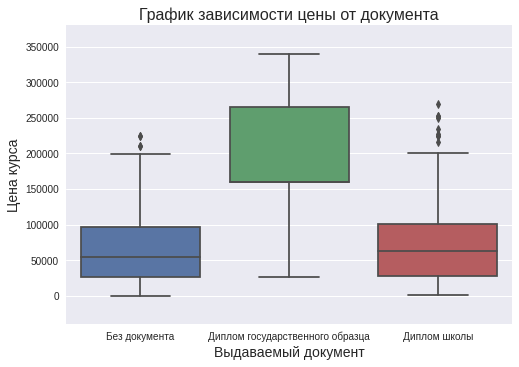

In [ ]:
# Отрисовка графика boxplot для дескрайб опыта работы

dbxp = sns.boxplot(x='diploma', y='price2', data=df)
plt.axis(ymax=380000)
dbxp.axes.set_title('График зависимости цены от документа' , fontsize=16)
dbxp.set_xlabel('Выдаваемый документ', fontsize=14)
dbxp.set_ylabel('Цена курса', fontsize=14)
plt.show()

---


In [ ]:
diploma_salary = df.groupby('diploma')['cource_rate']
diploma_salary.describe().astype(int)

,count,mean,std,min,25%,50%,75%,max
diploma,,,,,,,,
Без документа,223,8,1,3,7,8,9,10
Диплом государственного образца,73,9,1,3,10,10,10,10
Диплом школы,328,8,1,4,7,8,9,10


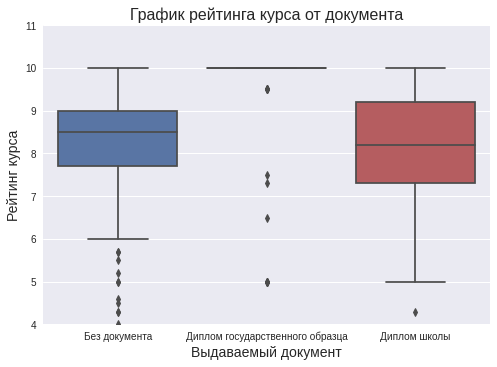

In [ ]:
# Отрисовка графика boxplot для дескрайб опыта работы

dbxp = sns.boxplot(x='diploma', y='cource_rate', data=df)
plt.axis(ymin=4, ymax=11)
dbxp.axes.set_title('График рейтинга курса от документа' , fontsize=16)
dbxp.set_xlabel('Выдаваемый документ', fontsize=14)
dbxp.set_ylabel('Рейтинг курса', fontsize=14)
plt.show()

#### Продолжительность обучения - стоимость  курса, рейтинг

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


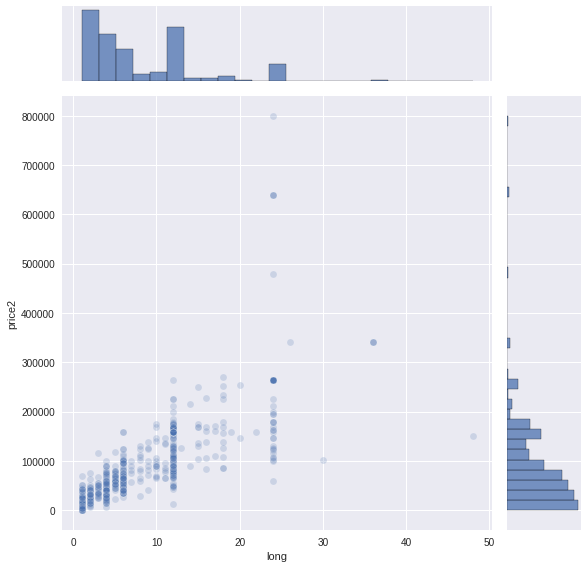

In [ ]:
sns.jointplot(x=df["long"], y=df["price2"],size=8, alpha=0.2)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


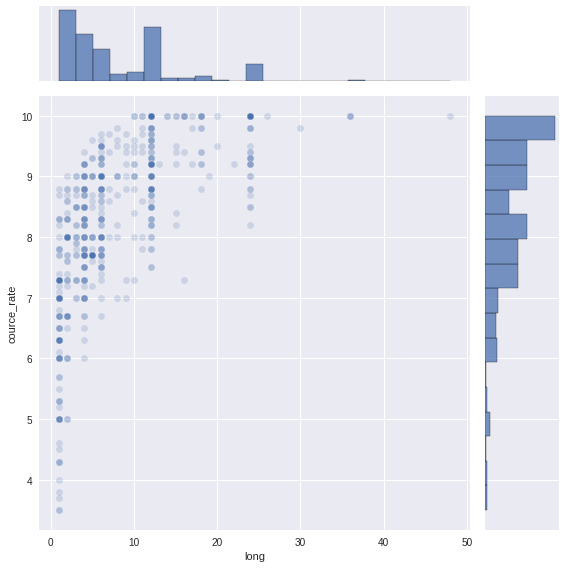

In [ ]:
sns.jointplot(x=df["long"], y=df["cource_rate"],size=8, alpha=0.2)
plt.show()

#### Область IT - стоимость  курса, рейтинг

In [ ]:
df['cat_set'] = df['category'].apply(lambda x: 'Разработка' if x in dev_list else 'Аналитика')

In [ ]:
cat_salary = df.groupby('cat_set')['price2']
cat_salary.describe().astype(int)

,count,mean,std,min,25%,50%,75%,max
cat_set,,,,,,,,
Аналитика,273,79750,96030,500,28000,49950,104664,800000
Разработка,351,89973,69671,0,39900,74900,130437,340452


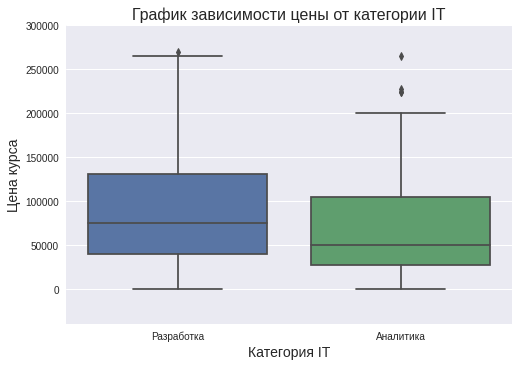

In [ ]:
# Отрисовка графика boxplot для дескрайб опыта работы

cbxp = sns.boxplot(x='cat_set', y='price2', data=df)
plt.axis(ymax=300000)
cbxp.axes.set_title('График зависимости цены от категории IT' , fontsize=16)
cbxp.set_xlabel('Категория IT', fontsize=14)
cbxp.set_ylabel('Цена курса', fontsize=14)
plt.show()

---


In [ ]:
cat_rate = df.groupby('cat_set')['cource_rate']
cat_rate.describe().astype(int)

,count,mean,std,min,25%,50%,75%,max
cat_set,,,,,,,,
Аналитика,273,8,1,3,7,8,9,10
Разработка,351,8,1,3,7,8,9,10


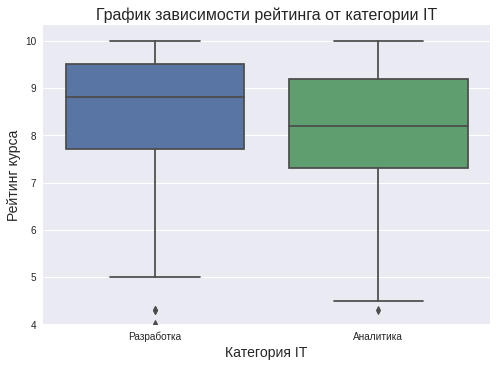

In [ ]:
# Отрисовка графика boxplot для дескрайб опыта работы

dbxp = sns.boxplot(x='cat_set', y='cource_rate', data=df)
plt.axis(ymin=4)
dbxp.axes.set_title('График зависимости рейтинга от категории IT' , fontsize=16)
dbxp.set_xlabel('Категория IT', fontsize=14)
dbxp.set_ylabel('Рейтинг курса', fontsize=14)
plt.show()

#### Рейтинг - цена

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


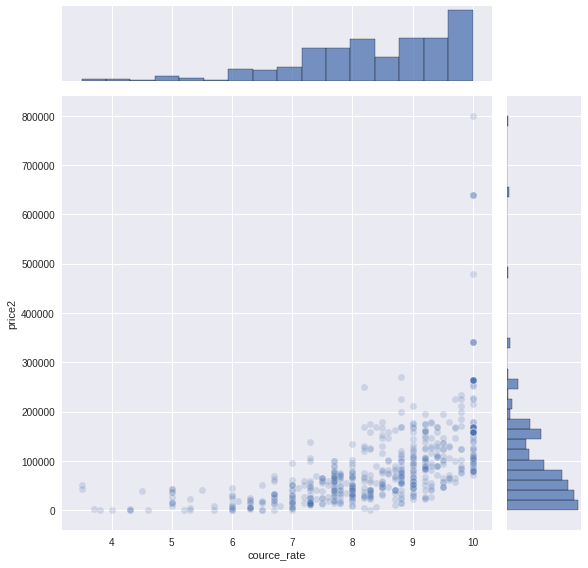

In [ ]:
sns.jointplot(x=df["cource_rate"], y=df["price2"],size=8, alpha=0.2)
plt.show()

# --- Статистический анализ ---

## Анализ типа данных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         624 non-null    object 
 1   school       624 non-null    object 
 2   category     624 non-null    object 
 3   long         624 non-null    int64  
 4   level        624 non-null    object 
 5   key_skills   624 non-null    object 
 6   key_stecks   624 non-null    object 
 7   price1       624 non-null    int64  
 8   price2       624 non-null    float64
 9   cource_rate  624 non-null    float64
 10  cource_rev   624 non-null    int64  
 11  review       624 non-null    int64  
 12  rate         624 non-null    float64
 13  diploma      624 non-null    object 
 14  format       624 non-null    object 
 15  cat_set      624 non-null    object 
dtypes: float64(3), int64(4), object(9)
memory usage: 78.1+ KB


Типы данных для датасета df:

0.   name - категориальный тип
1.   school - категориальный тип
2.   category - категориальный тип
3.   long - количественный тип
4.   level * - категориальный тип
5.   key_skills - категориальный тип
6.   key_stecks - категориальный тип
7.   price1 - количественный тип
8.   price2  - количественный тип
9.   cource_rate - порядковый тип
10.  cource_rev  - количественный тип
11.  review  - количественный тип
12.  rate - порядковый тип
13.  diploma * - категориальный тип
14.  format - категориальный тип
15.  cat_set - категориальный тип

*можно привести к порядковому

## Проверка нормальности количественных переменных

### Цена

(-40000.0, 300000.0, 0.0, 91.35)

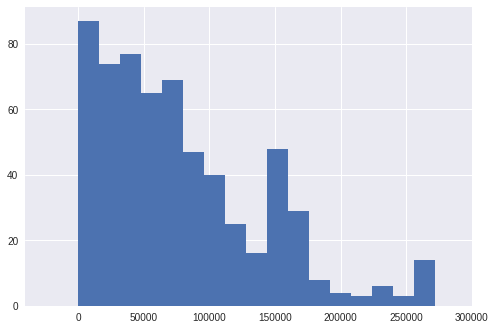

In [ ]:
plt.style.use('seaborn')
df['price2'].hist(bins=50)
plt.axis(xmax= 300000)

In [ ]:
stats.shapiro(df['price2'])

ShapiroResult(statistic=0.7534332871437073, pvalue=1.7977663783622799e-29)

Критерии ассиметрии, эксцесса, средне квадратическое отклонение

In [ ]:
df['price2'].describe().astype(int)

count       624
mean      85500
std       82334
min           0
25%       30825
50%       64950
75%      120532
max      800000
Name: price2, dtype: int64

In [ ]:
df['price2'].std().astype(int)  # средне квадратическое отклонение

82334

In [ ]:
df['price2'].skew() # коэффициент асимметрии

3.1926684109252754

In [ ]:
df['price2'].kurtosis() # коэффициент эксцесса

18.6366549074745

Тест д'Агостино

In [ ]:
stats.normaltest(df['price2'])

NormaltestResult(statistic=474.0280786021451, pvalue=1.1644225248661167e-103)

### Срок обучения

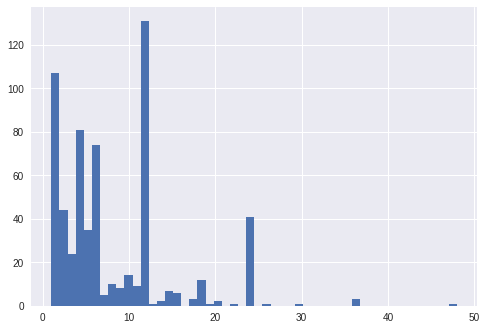

In [ ]:
plt.style.use('seaborn')
df['long'].hist(bins=50)
#plt.axis(xmax= 300000)

In [ ]:
stats.shapiro(df['long'])

ShapiroResult(statistic=0.8447647094726562, pvalue=3.1239621543089397e-24)

Критерии ассиметрии, эксцесса, средне квадратическое отклонение

In [ ]:
df['long'].describe().astype(int)

count    624
mean       8
std        6
min        1
25%        3
50%        6
75%       12
max       48
Name: long, dtype: int64

In [ ]:
df['long'].std().astype(int)  # средне квадратическое отклонение

6

In [ ]:
df['long'].skew() # коэффициент асимметрии

1.4404154915780691

In [ ]:
df['long'].kurtosis() # коэффициент эксцесса

2.753893489305651

Тест д'Агостино

In [ ]:
stats.normaltest(df['long'])

NormaltestResult(statistic=171.92362653495323, pvalue=4.647922131534714e-38)

### Рейтинг курса


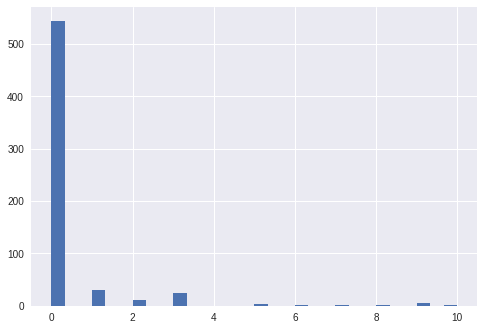

In [ ]:
plt.style.use('seaborn')
df['cource_rev'].hist(bins=30)


In [ ]:
stats.shapiro(df['cource_rev'])

ShapiroResult(statistic=0.3197059631347656, pvalue=7.174648137343064e-43)

Критерии ассиметрии, эксцесса, средне квадратическое отклонение

In [ ]:
df['cource_rev'].describe().astype(int)

count    624
mean       0
std        1
min        0
25%        0
50%        0
75%        0
max       10
Name: cource_rev, dtype: int64

In [ ]:
df['cource_rev'].std().astype(int)  # средне квадратическое отклонение

1

In [ ]:
df['cource_rev'].skew() # коэффициент асимметрии

4.914862829058384

In [ ]:
df['cource_rev'].kurtosis() # коэффициент эксцесса

27.81233660568236

Тест д'Агостино

In [ ]:
stats.normaltest(df['cource_rev'])

NormaltestResult(statistic=642.4289223554371, pvalue=3.1501555779644163e-140)

## Оценка связей

#### Диплом - стоимость  курса, рейтинг (категориальная - колич, колич)

In [ ]:
diploma_salary = df.groupby('diploma')['price2']
diploma_salary.describe().astype(int)

,count,mean,std,min,25%,50%,75%,max
diploma,,,,,,,,
Без документа,223,67069,53023,0,26282,54600,97000,224595
Диплом государственного образца,73,198789,147117,26910,159408,159408,264780,800000
Диплом школы,328,72817,54615,570,27580,63000,100755,270000


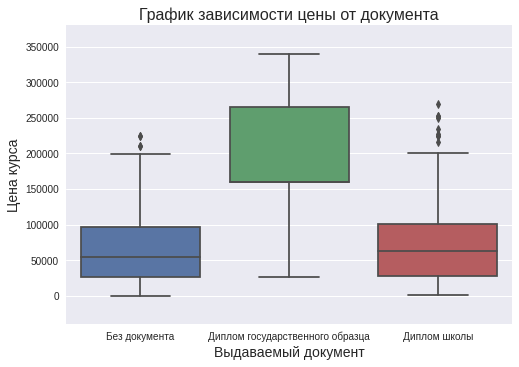

In [ ]:
# Отрисовка графика boxplot для дескрайб опыта работы

dbxp = sns.boxplot(x='diploma', y='price2', data=df)
plt.axis(ymax=380000)
dbxp.axes.set_title('График зависимости цены от документа' , fontsize=16)
dbxp.set_xlabel('Выдаваемый документ', fontsize=14)
dbxp.set_ylabel('Цена курса', fontsize=14)
plt.show()

In [ ]:
# Рассчитываем критерий Краскала-Уолиса

dip1 = np.array(df[df['diploma'] == 'Без документа']['price2'])
dip2 = np.array(df[df['diploma']== 'Диплом государственного образца']['price2'])
dip3 = np.array(df[df['diploma']== 'Диплом школы']['price2'])

stats.mstats.kruskalwallis(dip1, dip2, dip3)

KruskalResult(statistic=89.38571542241343, pvalue=3.891692483241389e-20)

---


In [ ]:
diploma_salary = df.groupby('diploma')['cource_rate']
diploma_salary.describe().astype(int)

,count,mean,std,min,25%,50%,75%,max
diploma,,,,,,,,
Без документа,223,8,1,3,7,8,9,10
Диплом государственного образца,73,9,1,3,10,10,10,10
Диплом школы,328,8,1,4,7,8,9,10


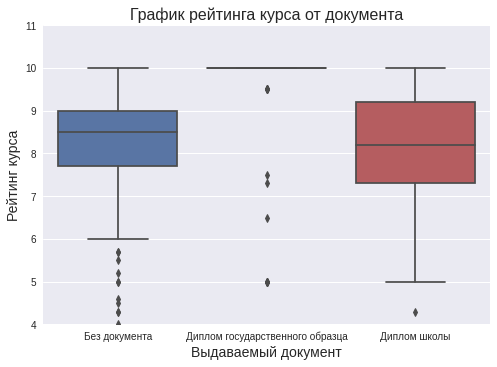

In [ ]:
# Отрисовка графика boxplot для дескрайб опыта работы

dbxp = sns.boxplot(x='diploma', y='cource_rate', data=df)
plt.axis(ymin=4, ymax=11)
dbxp.axes.set_title('График рейтинга курса от документа' , fontsize=16)
dbxp.set_xlabel('Выдаваемый документ', fontsize=14)
dbxp.set_ylabel('Рейтинг курса', fontsize=14)
plt.show()

In [ ]:
# Рассчитываем критерий Краскала-Уолиса

dir1 = np.array(df[df['diploma'] == 'Без документа']['cource_rate'])
dir2 = np.array(df[df['diploma']== 'Диплом государственного образца']['cource_rate'])
dir3 = np.array(df[df['diploma']== 'Диплом школы']['cource_rate'])

stats.mstats.kruskalwallis(dir1, dir2, dir3)

KruskalResult(statistic=85.64963453072315, pvalue=2.5201023140818983e-19)

#### Продолжительность обучения - стоимость  курса, рейтинг

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


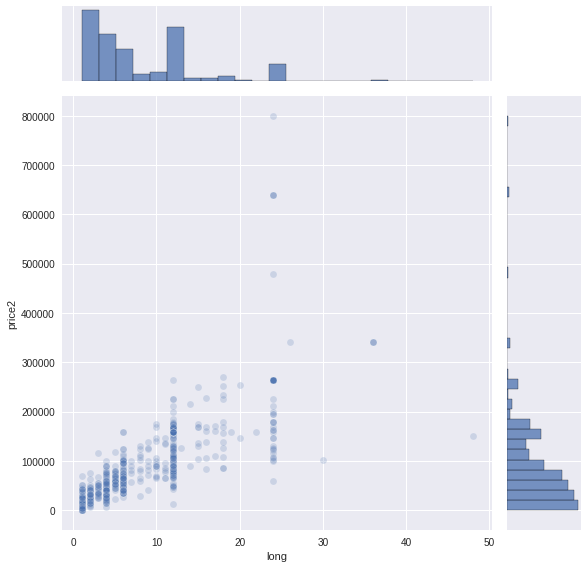

In [ ]:
sns.jointplot(x=df["long"], y=df["price2"],size=8, alpha=0.2)
plt.show()

In [ ]:
df[['long', 'price2']].corr()

,long,price2
long,1.000000,0.760768
price2,0.760768,1.000000


In [ ]:
scipy.stats.pearsonr(df.long, df.price2)

(0.7607675429477014, 7.071215485825991e-119)

---


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


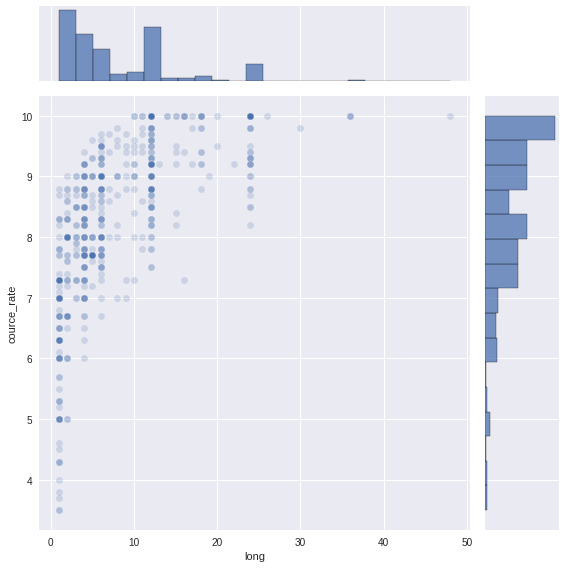

In [ ]:
sns.jointplot(x=df["long"], y=df["cource_rate"],size=8, alpha=0.2)
plt.show()

In [ ]:
df[['long', 'cource_rate']].corr(method='spearman')

,long,cource_rate
long,1.000000,0.796571
cource_rate,0.796571,1.000000


In [ ]:
scipy.stats.spearmanr(df.long, df.cource_rate)

SpearmanrResult(correlation=0.7965712173072184, pvalue=4.484585833348311e-138)

#### Область IT - стоимость  курса, рейтинг

In [ ]:
cat_salary = df.groupby('cat_set')['price2']
cat_salary.describe().astype(int)

,count,mean,std,min,25%,50%,75%,max
cat_set,,,,,,,,
Аналитика,273,79750,96030,500,28000,49950,104664,800000
Разработка,351,89973,69671,0,39900,74900,130437,340452


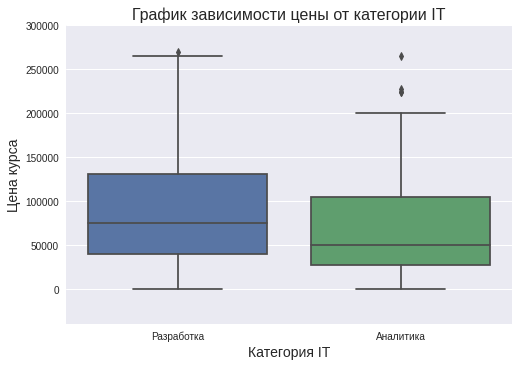

In [ ]:
# Отрисовка графика boxplot для дескрайб опыта работы

cbxp = sns.boxplot(x='cat_set', y='price2', data=df)
plt.axis(ymax=300000)
cbxp.axes.set_title('График зависимости цены от категории IT' , fontsize=16)
cbxp.set_xlabel('Категория IT', fontsize=14)
cbxp.set_ylabel('Цена курса', fontsize=14)
plt.show()

In [ ]:
# Рассчитываем критерий Манна-Уитни

cat1 = df[df['cat_set'] == 'Разработка']['price2']
cat2 = df[df['cat_set']== 'Аналитика']['price2']

scipy.stats.mannwhitneyu(cat1, cat2)

MannwhitneyuResult(statistic=55146.5, pvalue=0.0012004256136274062)

---


In [ ]:
cat_rate = df.groupby('cat_set')['cource_rate']
cat_rate.describe().astype(int)

,count,mean,std,min,25%,50%,75%,max
cat_set,,,,,,,,
Аналитика,273,8,1,3,7,8,9,10
Разработка,351,8,1,3,7,8,9,10


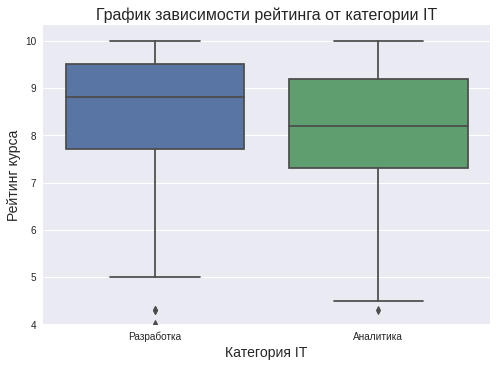

In [ ]:
# Отрисовка графика boxplot для дескрайб опыта работы

dbxp = sns.boxplot(x='cat_set', y='cource_rate', data=df)
plt.axis(ymin=4)
dbxp.axes.set_title('График зависимости рейтинга от категории IT' , fontsize=16)
dbxp.set_xlabel('Категория IT', fontsize=14)
dbxp.set_ylabel('Рейтинг курса', fontsize=14)
plt.show()

In [ ]:
# Рассчитываем критерий Манна-Уитни

car1 = df[df['cat_set'] == 'Разработка']['cource_rate']
car2 = df[df['cat_set']== 'Аналитика']['cource_rate']

scipy.stats.mannwhitneyu(car1, car2)

MannwhitneyuResult(statistic=55067.0, pvalue=0.00131641647152601)

#### Рейтинг - цена

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


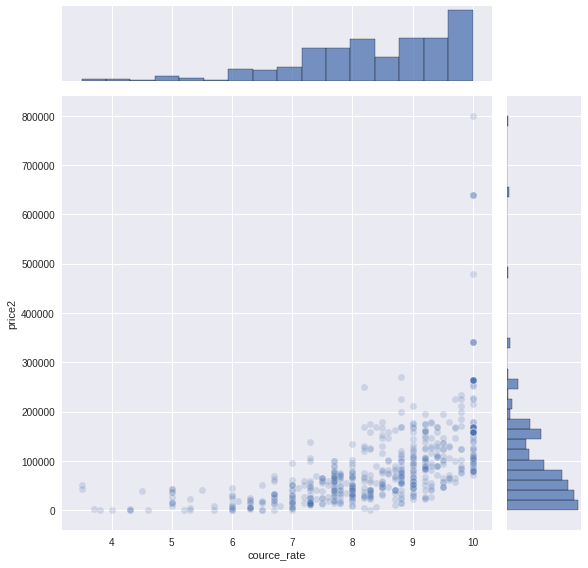

In [ ]:
sns.jointplot(x=df["cource_rate"], y=df["price2"],size=8, alpha=0.2)
plt.show()

In [ ]:
df[['cource_rate', 'price2']].corr()

,cource_rate,price2
cource_rate,1.000000,0.591987
price2,0.591987,1.000000


In [ ]:
scipy.stats.pearsonr(df.cource_rate, df.price2)

(0.5919868198878713, 2.8452866711445706e-60)

In [ ]:
df[['cource_rate', 'price2']].corr(method='spearman')

,cource_rate,price2
cource_rate,1.000000,0.776891
price2,0.776891,1.000000


In [ ]:
scipy.stats.spearmanr(df.cource_rate, df.price2)

SpearmanrResult(correlation=0.77689087699527, pvalue=4.440575847282389e-127)

In [ ]:
df['keys'] = df['key_skills'] + df['key_stecks']

In [ ]:
df = df[df['keys'].astype(bool)]

In [ ]:
df


In [ ]:
dx_keys = df.explode('keys')
dx_lev_key = dx_keys.explode('level')


In [ ]:
def lev_dig(val):
  if val == 'Новичкам':
    n = 0
  elif val == 'Опытным':
    n = 1
  else:
    n = 2
  return n

dx_lev_key['lev_dig'] = dx_lev_key['level'].apply(lev_dig)

In [ ]:
wd=pd.crosstab(dx_lev_key['keys'], dx_lev_key['lev_dig']) 
wd

lev_dig,0,1,2
keys,,,
.NET,5,4,1
1С,8,5,0
3ds Max,1,0,1
AARRR,1,1,0
ADO.NET,2,3,0
...,...,...,...
Яндекс DataLens,1,1,0
Яндекс Вебмастер,2,1,2
Яндекс Директ,1,0,2


In [ ]:
chi2, prob, dof, expected = scipy.stats.chi2_contingency(wd)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
 
print(output.format( chi2, dof, prob))

test Statistics: 1484.3610304992478
degrees of freedom: 1188
p-value: 7.994852168826735e-09



## Проверка гипотезы

Определим топ навыков по рейтингу и стоимости

In [ ]:
dx_gb = dx_keys.groupby('keys')
dsp = dx_gb['price2'].describe()

In [ ]:
dsr = dx_gb['cource_rate'].describe()
dsr

In [ ]:
dsp[['count', 'mean']].astype(int).sort_values(by='count', ascending=False)[:10]

In [ ]:
dsr[['count', 'mean']].sort_values(by='count', ascending=False)[:10]

### ГИПОТЕЗА № 1
> Гпотеза Н0: Знание языка программирования Java напрямую никак не влияет на стоимость курса

In [ ]:
# Для проверки гипотезы выделим в датасете навыки содержащие навык "Английский язык"
# a) Вакансии содержащие знание английского языка
# б) Вакансии без английского языка

dx_keys['keys_jav'] = dx_keys['keys'].apply(lambda row: 'y' if row.lower() == 'java' else 'n')

total1 = ['No Java', 'Yes Java']

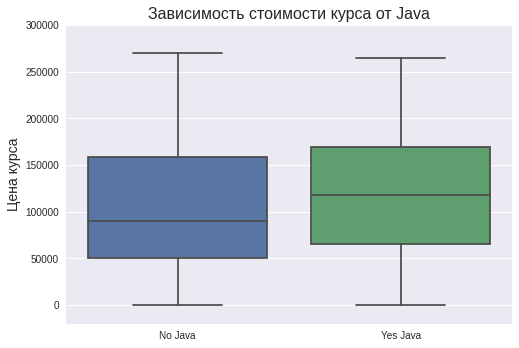

In [ ]:
# Представим графически сравнение групп
eng = sns.boxplot(x='keys_jav', y='price2', data=dx_keys)
plt.axis(ymin=-20000, ymax=300000)
eng.axes.set_title('Зависимость стоимости курса от Java' , fontsize=16)
eng.set_xlabel('')
eng.set_ylabel('Цена курса', fontsize=14)
eng.set_xticklabels(total1)
plt.show()

In [ ]:
# Определяем значение статистики стьюдента p-value

scipy.stats.mannwhitneyu(d_jav['price2'], d_nojav['price2'])

MannwhitneyuResult(statistic=228310.0, pvalue=0.010756347884244517)

In [ ]:
# Cоздаем фильтры по группам

d_jav = dx_keys[dx_keys['keys_jav'] == 'y']
d_nojav = dx_keys[dx_keys['keys_jav'] == 'n']

 Для сравнения пары групп количественного признака ненормального распределения используем критерий Манна-Уитни

> По результатам оценки критерием Манна-Уитни отвергаем Н0 гипотезу об отсутствии связи стоимости курса с владением Java. Категориальный признак имеет статистически значимое влияние на цену

---

### ГИПОТЕЗА № 2
> Гпотеза Н0: Знание языка программирования Java напрямую никак не влияет на уровень рейтинга курса

In [ ]:
dx_keys.head(4)

,name,school,category,long,level,key_skills,key_stecks,price1,price2,cource_rate,cource_rev,review,rate,diploma,format,cat_set,keys,keys_jav
0,Профессия «С#-разработчик» от Skillbox,skillbox,Backend-разработка,12,"[Новичкам, Профессионалам]",[],"[3ds Max, ArchiCAD, Git, Microsoft Visual Stud...",166750,125063.0,10.0,3,277,4.8,Без документа,[Записанные видеоуроки],Разработка,3ds Max,n
0,Профессия «С#-разработчик» от Skillbox,skillbox,Backend-разработка,12,"[Новичкам, Профессионалам]",[],"[3ds Max, ArchiCAD, Git, Microsoft Visual Stud...",166750,125063.0,10.0,3,277,4.8,Без документа,[Записанные видеоуроки],Разработка,ArchiCAD,n
0,Профессия «С#-разработчик» от Skillbox,skillbox,Backend-разработка,12,"[Новичкам, Профессионалам]",[],"[3ds Max, ArchiCAD, Git, Microsoft Visual Stud...",166750,125063.0,10.0,3,277,4.8,Без документа,[Записанные видеоуроки],Разработка,Git,n
0,Профессия «С#-разработчик» от Skillbox,skillbox,Backend-разработка,12,"[Новичкам, Профессионалам]",[],"[3ds Max, ArchiCAD, Git, Microsoft Visual Stud...",166750,125063.0,10.0,3,277,4.8,Без документа,[Записанные видеоуроки],Разработка,Microsoft Visual Studio,n


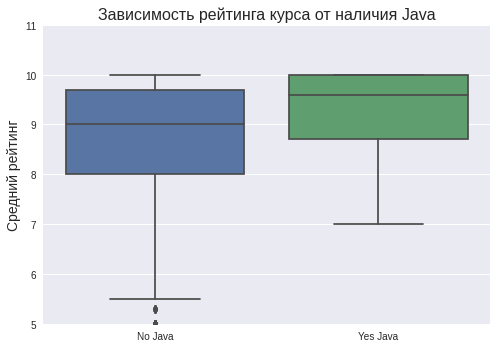

In [ ]:
# Представим графически сравнение групп
eng = sns.boxplot(x='keys_jav', y='cource_rate', data=dx_keys)
plt.axis(ymin=5, ymax=11)
eng.axes.set_title('Зависимость рейтинга курса от наличия Java' , fontsize=16)
eng.set_xlabel('')
eng.set_ylabel('Средний рейтинг', fontsize=14)
eng.set_xticklabels(total1)
plt.show()

In [ ]:
# Определяем значение статистики стьюдента p-value

scipy.stats.mannwhitneyu(d_jav['cource_rate'], d_nojav['cource_rate'])

MannwhitneyuResult(statistic=239137.0, pvalue=0.0008129116596667508)

> По результатам оценки критерием Манна-Уитни отвергаем Н0 гипотезу об отсутствии связи рейтинга курса с владением Java. Категориальный признак имеет статистически значимое влияние на рейтинг

### ГИПОТЕЗА № 3
> Гпотеза Н0: Знание диалекта языка программирования PostgreSQL напрямую никак не влияет на стоимость курса

In [ ]:
# Для проверки гипотезы выделим в датасете навыки содержащие навык "Английский язык"
# a) Вакансии содержащие знание английского языка
# б) Вакансии без английского языка

dx_keys['keys_psql'] = dx_keys['keys'].apply(lambda row: 'y' if row.lower() == 'postgresql' else 'n')

total2 = ['No PostgreSQL', 'Yes PostgreSQL']

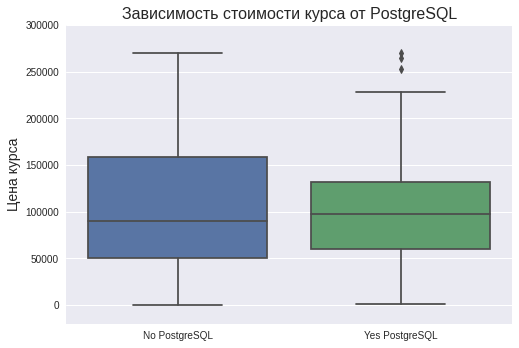

In [ ]:
# Представим графически сравнение групп
eng = sns.boxplot(x='keys_psql', y='price2', data=dx_keys)
plt.axis(ymin=-20000, ymax=300000)
eng.axes.set_title('Зависимость стоимости курса от PostgreSQL' , fontsize=16)
eng.set_xlabel('')
eng.set_ylabel('Цена курса', fontsize=14)
eng.set_xticklabels(total2)
plt.show()

In [ ]:
# Определяем значение статистики стьюдента p-value

scipy.stats.mannwhitneyu(d_psql['price2'], d_nopsql['price2'])

MannwhitneyuResult(statistic=196924.0, pvalue=0.6129704452038589)

In [ ]:
# Cоздаем фильтры по группам

d_psql = dx_keys[dx_keys['keys_psql'] == 'y']
d_nopsql = dx_keys[dx_keys['keys_psql'] == 'n']

 Для сравнения пары групп количественного признака ненормального распределения используем критерий Манна-Уитни

> По результатам оценки критерием Манна-Уитни получаем недостаточно оснований для отклонения Н0 гипотезы об отсутствии связи стоимости курса с владением PostgreSQL. Связь может отсутствовать

---

### ГИПОТЕЗА № 4
> Гпотеза Н0: Знание диалекта языка программирования PostgreSQL напрямую никак не влияет на уровень рейтинга курса

In [ ]:
dx_keys.head(4)

,name,school,category,long,level,key_skills,key_stecks,price1,price2,cource_rate,cource_rev,review,rate,diploma,format,cat_set,keys,keys_jav
0,Профессия «С#-разработчик» от Skillbox,skillbox,Backend-разработка,12,"[Новичкам, Профессионалам]",[],"[3ds Max, ArchiCAD, Git, Microsoft Visual Stud...",166750,125063.0,10.0,3,277,4.8,Без документа,[Записанные видеоуроки],Разработка,3ds Max,n
0,Профессия «С#-разработчик» от Skillbox,skillbox,Backend-разработка,12,"[Новичкам, Профессионалам]",[],"[3ds Max, ArchiCAD, Git, Microsoft Visual Stud...",166750,125063.0,10.0,3,277,4.8,Без документа,[Записанные видеоуроки],Разработка,ArchiCAD,n
0,Профессия «С#-разработчик» от Skillbox,skillbox,Backend-разработка,12,"[Новичкам, Профессионалам]",[],"[3ds Max, ArchiCAD, Git, Microsoft Visual Stud...",166750,125063.0,10.0,3,277,4.8,Без документа,[Записанные видеоуроки],Разработка,Git,n
0,Профессия «С#-разработчик» от Skillbox,skillbox,Backend-разработка,12,"[Новичкам, Профессионалам]",[],"[3ds Max, ArchiCAD, Git, Microsoft Visual Stud...",166750,125063.0,10.0,3,277,4.8,Без документа,[Записанные видеоуроки],Разработка,Microsoft Visual Studio,n


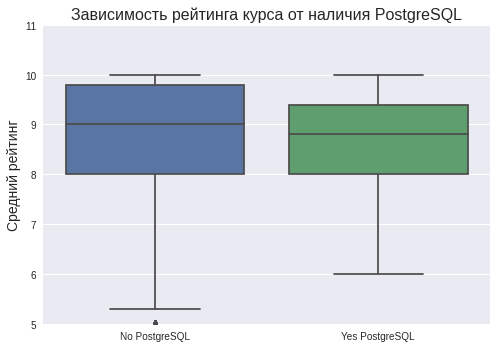

In [ ]:
# Представим графически сравнение групп
eng = sns.boxplot(x='keys_psql', y='cource_rate', data=dx_keys)
plt.axis(ymin=5, ymax=11)
eng.axes.set_title('Зависимость рейтинга курса от наличия PostgreSQL' , fontsize=16)
eng.set_xlabel('')
eng.set_ylabel('Средний рейтинг', fontsize=14)
eng.set_xticklabels(total2)
plt.show()

In [ ]:
# Определяем значение статистики стьюдента p-value

scipy.stats.mannwhitneyu(d_psql['cource_rate'], d_nopsql['cource_rate'])

MannwhitneyuResult(statistic=182415.5, pvalue=0.582459913592798)

> По результатам оценки критерием Манна-Уитни получаем недостаточно оснований для отклонения Н0 гипотезы об отсутствии связи рейтинга курса с владением PostgreSQL. Связь может отсутствовать